# My Tesla model Y performance.  Now that we have seen the application of the least-squares regression line in action, lets put it to the test.  Here are more data (data is plural).

$$
\begin{array}{c|c|c|c|c}
May 6th, 2024  & May 8th, 2024 & May 13th, 2024 & May 15th, 2024 & May 17th, 2024 \\
\hline
(0,51)  & (0,32) & (0,12) &(0,36) & (0,?)\\
(12,70) & (7,50) & (6,33)& (7,51)& (6,?)\\
(20,81) & (15,66) & (13, 52)& (18,72)&(11,?)\\
(28,90) & (20,75) & (18,62)&(31,90)& (17,?)\\
& (30,88) & (29,78) && (23,?)\\
&(32,90) & (35,85) &&\\
& & (40,90)&&
\end{array}
$$



Yes, the 2nd component of the ordered pair for May 17th is missing, but we will fill in the details using the least-squares regression line.  Taking the values from May 15th, 2024 (only the values from this day) $\textbf{construct a least-square regression line, with the following set of equations shown in class}$

$$
\left\{ \begin{array}{ll}
nb + (\sum x) m = \sum y & \\
& \\
(\sum x) b + (\sum x^2) m = \sum xy & 
\end{array} \right.
$$


Let $B(t)$ to represent the percent ofthe battery full (depedent variable) given some time $t$ (independent variable), where $t$ is measured in minutes after the Tesla has started charging.

- **Using the $B(t)$ linear function, fill in the missing values of May 17th, 2024.**
- **Using the $B(t)$ linear function, show what the values of the percent of the battery full would be using the times given for May 6th, 2024.**
- **Describe the strenght and weakness of your model (least-squares regression line).**

Here we will show the calculations for the sums.

In [11]:
import numpy as np

# Time (independent variable)
t = np.array([0, 7, 18, 31])

# Battery percentage (dependent variable)
B_t = np.array([36, 51, 72, 90])

# Calculate the necessary sums
sum_t = np.sum(t)
sum_B_t = np.sum(B_t)
sum_t_squared = np.sum(t**2)
sum_t_B_t = np.sum(t * B_t)

# Display the results
print("Sum of t (Σt):", sum_t)
print("Sum of B(t) (ΣB(t)):", sum_B_t)
print("Sum of t^2 (Σt^2):", sum_t_squared)
print("Sum of t * B(t) (Σt * B(t)):", sum_t_B_t)



Sum of t (Σt): 56
Sum of B(t) (ΣB(t)): 249
Sum of t^2 (Σt^2): 1334
Sum of t * B(t) (Σt * B(t)): 4443


$$
\begin{align*}
\sum x &= 0 + 7 + 18 + 31 = 56 \\
\sum y &= 36 + 51 + 72 + 90 = 249 \\
\sum x^2 &= 0^2 + 7^2 + 18^2 + 31^2 = 1334 \\
\sum xy &= 0 \cdot 36 + 7 \cdot 51 + 18 \cdot 72 + 31 \cdot 90 = 4443
\end{align*}
$$

From the data points here is the system of equations that would be formed.  We now need to solve for b and m.

$$
\left\{ \begin{array}{ll}
4b + 56 m = 249 & \\
& \\
56 b + 1334 m = 4443 & 
\end{array} \right.
$$

In [13]:
# Using Cramer's Rule

D = 4*1334 - 56*56

Db = 249*1334 - 56 * 4443

Dm = 4*4443 - 249 * 56

b = Db / D

m = Dm / D

print(D, Db, Dm, b, m)


2200 83358 3828 37.89 1.74


Our linear regression equation is given by $y=1.74x + 37.89$, or in context $B(t)=1.74 t +37.89$.

In [14]:
# Let apply our model for the times given for May 17th

# Times from May 17th, 2024
times_may_17 = np.array([0, 6, 11, 17, 23])

# Calculate the battery percentages for these times
battery_percentages_may_17 = m * times_may_17 + b

# Display the results
for t, B_t in zip(times_may_17, battery_percentages_may_17):
    print(f"At t = {t} minutes, B(t) = {B_t:.2f}%")

At t = 0 minutes, B(t) = 37.89%
At t = 6 minutes, B(t) = 48.33%
At t = 11 minutes, B(t) = 57.03%
At t = 17 minutes, B(t) = 67.47%
At t = 23 minutes, B(t) = 77.91%


In [15]:
# Let apply our model for the times given for May 6th

# Times from May 6th, 2024
times_may_6 = np.array([0, 12, 20, 28])

# Calculate the battery percentages for these times
battery_percentages_may_6 = m * times_may_6 + b

# Display the results
for t, B_t in zip(times_may_6, battery_percentages_may_6):
    print(f"At t = {t} minutes, B(t) = {B_t:.2f}%")

At t = 0 minutes, B(t) = 37.89%
At t = 12 minutes, B(t) = 58.77%
At t = 20 minutes, B(t) = 72.69%
At t = 28 minutes, B(t) = 86.61%


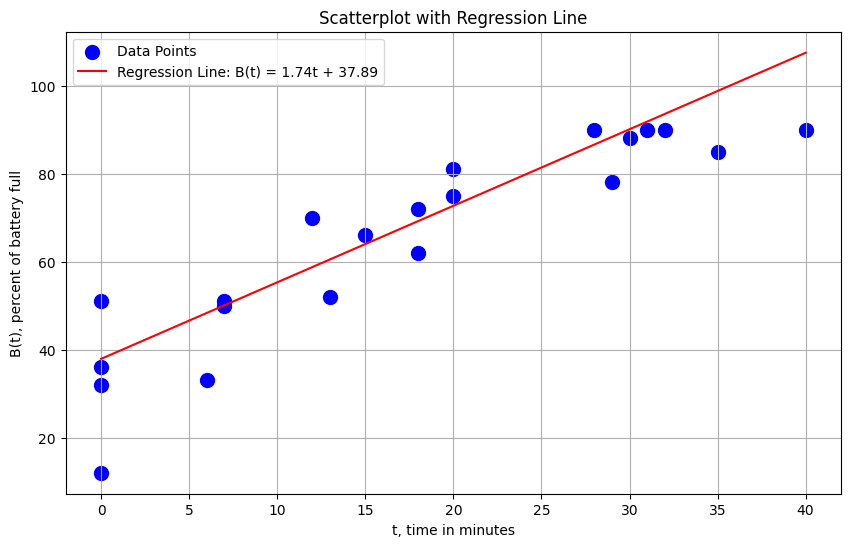

In [16]:
# Let's construct a scatterplot of the data along with the linear model.

import numpy as np
import matplotlib.pyplot as plt

# Data points
x = np.array([0, 0, 0, 0, 12, 7, 6, 7, 20, 15, 13, 18, 28, 20, 18, 31, 30, 29, 32, 35, 40])
y = np.array([51, 32, 12, 36, 70, 50, 33, 51, 81, 66, 52, 72, 90, 75, 62, 90, 88, 78, 90, 85, 90])

# Regression line
def regression_line(x):
    return 1.74 * x + 37.89

# Generate values for the regression line
x_regression = np.linspace(min(x), max(x), 100)
y_regression = regression_line(x_regression)

# Create the scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', marker='o', s=100, label='Data Points')

# Plot the regression line
plt.plot(x_regression, y_regression, color='red', label='Regression Line: B(t) = 1.74t + 37.89')

# Adding labels and title
plt.xlabel('t, time in minutes')
plt.ylabel('B(t), percent of battery full')
plt.title('Scatterplot with Regression Line')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


Recall that the regression line was created only using the data from May 6th, so the regression line is not the line of best fit for all the data points.

In [ ]:
### Strengths and weakness of the model.

some of the strenghts of this model
- easy to construct
- visually the data points cluster nicely around the model, so the model seems reasonable

some of the weakness of this model
- the model visually seems reasonable, but the points form an exponential shape
- the model is not realistic because after the 35th minutes the prediction is that the battery will be more than 100% full
